In [1]:
import pandas as pd  # used for data manipulation
import csv           # used for working with csv files

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4


# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')


In [2]:
data = pd.read_csv('UK_gpg_data.csv', encoding='utf-8')

In [3]:
data['Sector'].fillna('Other', inplace=True)
data['OrgType'].fillna('Other', inplace=True)


In [4]:

data['SingleSector'] = data['Sector'].str.split(',').str[0]
data['SingleSector'] = data['SingleSector'].str.split(';').str[0]

In [5]:
# fig, ax = plt.subplots(figsize=(8,8))
# sns.countplot(y='SingleSector', hue='PaidMore', data=data, ax=ax)

In [6]:
data1 = data[data['OrgType'] != 'Other']

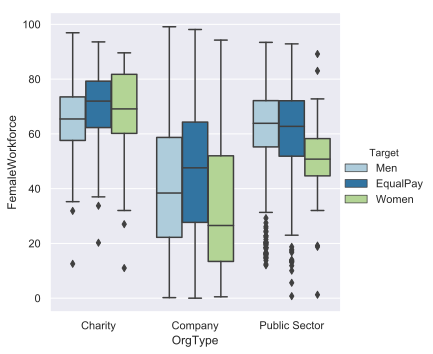

In [7]:
sns.set_palette("Paired", 5)
sns.catplot(x='OrgType', y='FemaleWorkforce', hue='Target', data=data1, kind='box').savefig('workforce_org.svg')


# Observation: Charitable orgs have a strong tendency to provide equal/more pay for women

In [8]:
#sns.catplot(x='OrgType', y='DiffMedianHourlyPercent', hue='PaidMore', data=data, kind='point')

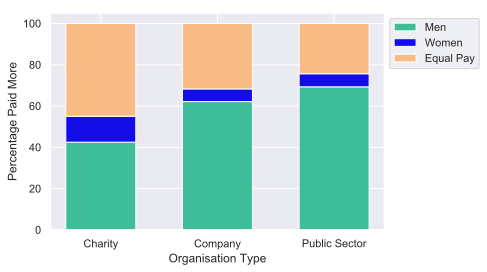

In [9]:
try_data =  data[pd.notnull(data['OrgType'])]
x = data.pivot(columns='OrgType', values='Target')

charity = x['Charity'].value_counts().to_dict()
total = sum(charity.values())
for key in charity:
    charity[key] = charity[key]/total * 100


company = x['Company'].value_counts().to_dict()
total = sum(company.values())
for key in company:
    company[key] = company[key]/total * 100

    
public_sector = x['Public Sector'].value_counts().to_dict()
total = sum(public_sector.values())
for key in public_sector:
    public_sector[key] = public_sector[key]/total * 100

    
men_paid = [charity['Men'], company['Men'], public_sector['Men']]
women_paid = [charity['Women'], company['Women'], public_sector['Women']]
equal_pay = [charity['EqualPay'], company['EqualPay'], public_sector['EqualPay']]




#Ref: https://python-graph-gallery.com/13-percent-stacked-barplot/

r = [0,1,2]
barWidth = 0.60
names = ('Charity','Company','Public Sector')
plt.bar(r, men_paid, color='#3dbe98', edgecolor='white', width=barWidth, label='Men')
plt.bar(r, women_paid, bottom=men_paid, color='#140ce7', edgecolor='white', width=barWidth, label='Women')
plt.bar(r, equal_pay, bottom=[i+j for i,j in zip(men_paid, women_paid)], color='#f9bc86', edgecolor='white', width=barWidth, label='Equal Pay')

 
plt.xticks(r, names)
plt.xlabel("Organisation Type")
plt.ylabel("Percentage Paid More")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()



In [18]:
men_paid

[42.47619047619048, 62.14746427216391, 69.31174089068826]

Text(0.5,0,'Employer Size')

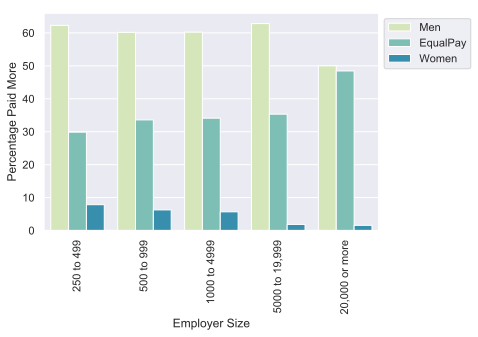

In [10]:
occupation_counts = (data.groupby(['EmployerSize'])['Target']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('EmployerSize'))

sns.set_palette("YlGnBu", 4)



p = sns.barplot(x="EmployerSize", y="Percentage", hue="Target", data=occupation_counts, 
                order=['250 to 499', '500 to 999', '1000 to 4999', '5000 to 19,999', '20,000 or more'])
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Percentage Paid More')
plt.xlabel('Employer Size')

In [11]:
#sns.barplot(x="OrgType", y="OrgType", data=data, estimator=lambda x: len(x) / len(df) * 100, hue='PaidMore')

Text(0,0.5,'Sector')

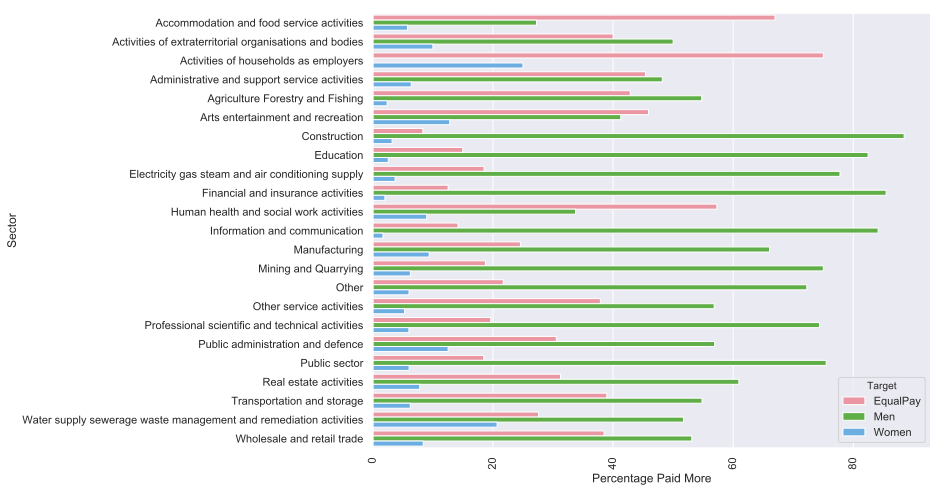

In [12]:
occupation_counts = (data.groupby(['SingleSector'])['Target']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('SingleSector'))

occupation_counts

sns.set_palette("RdBu", 1)

fig, ax = plt.subplots(figsize=(10,8))

p = sns.barplot(y="SingleSector", x="Percentage", hue="Target", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.xlabel('Percentage Paid More')
plt.ylabel('Sector')

In [13]:
us_data = pd.read_csv('Workbook3_1.csv')

In [14]:
copy_us_data = us_data[['Category', 'MaleMedianWE', 'FemaleMedianWE']]

In [15]:
copy_us_data = copy_us_data.melt(id_vars=['Category'], 
                  var_name="Gender", value_name="Median_Weekly_Earnings")

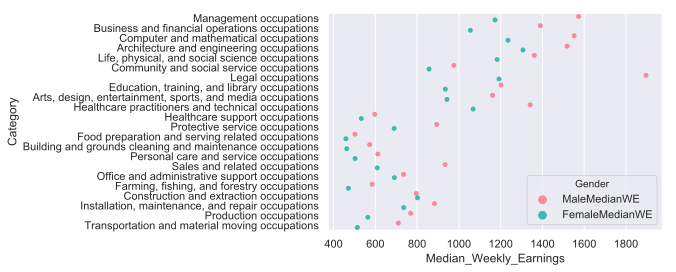

In [16]:
fig, ax = plt.subplots()
sns.stripplot(y='Category', x='Median_Weekly_Earnings', data=copy_us_data, hue='Gender', ax=ax, split = True)


In [17]:
copy_us_data.to_csv('Workbook3_2.csv', encoding='utf-8')